In [1]:
# Prepare
import pandas as pd
%load_ext rpy2.ipython
%R source('/Users/denis/Documents/Projects/scripts/Support.R')
%R library(gplots)

/Users/denis/my-venv/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: 
Attaching package: ‘gplots’


  warnings.warn(x, RRuntimeWarning)
/Users/denis/my-venv/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: The following object is masked from ‘package:stats’:

    lowess


  warnings.warn(x, RRuntimeWarning)


array(['gplots', 'tools', 'stats', 'graphics', 'grDevices', 'utils',
       'datasets', 'methods', 'base'], 
      dtype='|S9')

In [33]:
# Read infiles
infiles = ['../f2-normalized_expression_data.dir/podocyte_cell_line-vst.txt', '../f2-normalized_expression_data.dir/primary_podocyte-vst.txt', '../rawdata/hiv_sample_annotation.txt']

# Get dataframes
cellLineExpressionDataframe = pd.read_table(infiles[0]).set_index('gene_symbol')
primaryExpressionDataframe = pd.read_table(infiles[1]).set_index('gene_symbol').drop(['NK1', 'NK2'], axis=1)
sampleAnnotationDataframe = pd.read_table(infiles[2]).set_index('sample_name').drop(['NK1', 'NK2'], axis=0)
cellLineAnnotationDataframe = sampleAnnotationDataframe[sampleAnnotationDataframe['cell_type'] == 'cell_line'].drop(['patient','patient_group'], axis=1)
primaryAnnotationDataframe = sampleAnnotationDataframe[sampleAnnotationDataframe['cell_type'] == 'primary_podocyte'].drop(['timepoint','batch'], axis=1)

In [42]:
primaryAnnotationDataframe.head()

,cell_type,treatment,patient_group,patient
sample_name,,,,
B10C,primary_podocyte,untreated,B,B10
B11C,primary_podocyte,untreated,B,B11
B11G,primary_podocyte,gfp_control,B,B11
B11N,primary_podocyte,hiv_infection,B,B11
B12G,primary_podocyte,gfp_control,B,B12


In [35]:
%R -i cellLineExpressionDataframe,primaryExpressionDataframe,cellLineAnnotationDataframe,primaryAnnotationDataframe

## Podocyte Data

In [77]:
%%R
# Get gene variance
geneVariance <- apply(primaryExpressionDataframe, 1, var)

# Get top genes
topGenes <- names(sort(geneVariance, decreasing=TRUE)[1:1000])

# Get plot matrix
plotMatrix <- as.matrix(primaryExpressionDataframe[topGenes,])

# Get color labels
colorLabels <- getLegend(rownames(primaryAnnotationDataframe), primaryAnnotationDataframe$patient, colors=c('#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf'))

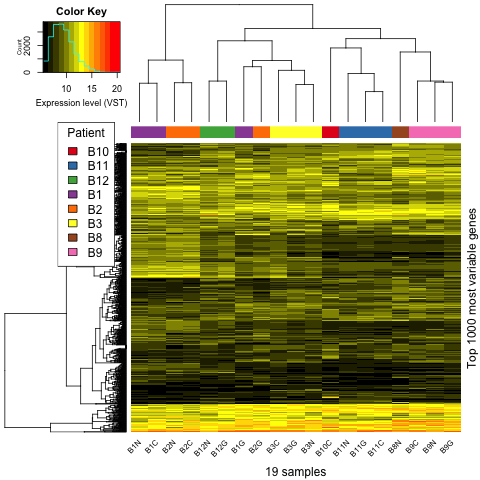

In [83]:
%%R
# Plot margins
par(mar=c(5,4,0,2))

# Plot
heatmap.2(plotMatrix,
          col=colorRampPalette(c('black','yellow','red')),
          trace='none',
          labRow = '',
          xlab = paste0(ncol(plotMatrix), ' samples'),
          ylab=paste0('Top ', nrow(plotMatrix), ' most variable genes'),
          mar=c(5,2),
          srtCol=45,
          key.title='Color Key',
          key.xlab='Expression level (VST)',
          ColSideColors=colorLabels$colors,
          hclustfun = function(x) hclust(x, method='complete'))

# Add legend
legend(0, 0.7, legend=names(colorLabels$legend), fill=colorLabels$legend, title='Patient')

## Cell Line Data

In [73]:
%%R
# Get gene variance
geneVariance <- apply(cellLineExpressionDataframe, 1, var)

# Get top genes
topGenes <- names(sort(geneVariance, decreasing=TRUE)[1:1000])

# Get plot matrix
plotMatrix <- as.matrix(cellLineExpressionDataframe[topGenes,])

# Get color labels
colorLabels <- getLegend(rownames(cellLineAnnotationDataframe), cellLineAnnotationDataframe$batch, colors=rainbow(3))

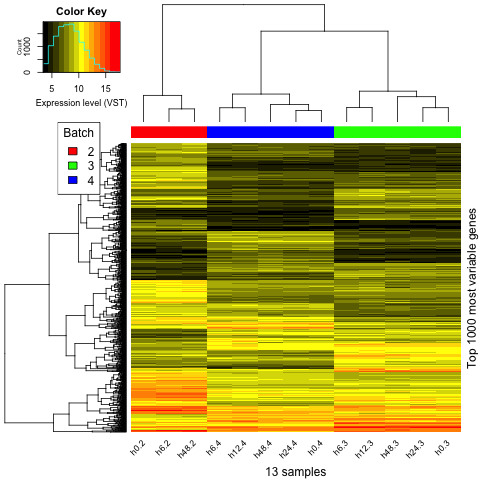

In [74]:
%%R
# Plot margins
par(mar=c(5,4,0,2))

# Plot
heatmap.2(plotMatrix,
          col=colorRampPalette(c('black','yellow','red')),
          trace='none',
          labRow = '',
          xlab = paste0(ncol(plotMatrix), ' samples'),
          ylab=paste0('Top ', nrow(plotMatrix), ' most variable genes'),
          mar=c(5,2),
          srtCol=45,
          key.title='Color Key',
          key.xlab='Expression level (VST)',
          ColSideColors=colorLabels$colors,
          hclustfun = function(x) hclust(x, method='complete'))

# Add legend
legend(0, 0.7, legend=names(colorLabels$legend), fill=colorLabels$legend, title='Batch')